Found 16 mosquito trapping files.
File list saved to: /home/cicf/vikruhil-cicf/week06-fair-data/NEON_count-mosquitoes/mosquito_analysis_results/processed_files_20250424_122140.txt

Processing trap files...
✅ Processed: NEON.D16.ABBY.DP1.10043.001.mos_trapping.2023-05.basic.20241118T005806Z.csv
✅ Processed: NEON.D05.UNDE.DP1.10043.001.mos_trapping.2023-04.basic.20241118T213636Z.csv
✅ Processed: NEON.D16.ABBY.DP1.10043.001.mos_trapping.2023-06.basic.20241118T212801Z.csv
✅ Processed: NEON.D05.UNDE.DP1.10043.001.mos_trapping.2023-06.basic.20241118T023424Z.csv
✅ Processed: NEON.D16.ABBY.DP1.10043.001.mos_trapping.2023-07.basic.20241118T110514Z.csv
✅ Processed: NEON.D05.UNDE.DP1.10043.001.mos_trapping.2023-07.basic.20241118T040455Z.csv
✅ Processed: NEON.D05.UNDE.DP1.10043.001.mos_trapping.2023-08.basic.20241118T021852Z.csv
✅ Processed: NEON.D05.UNDE.DP1.10043.001.mos_trapping.2023-12.basic.20241118T122428Z.csv
✅ Processed: NEON.D05.UNDE.DP1.10043.001.mos_trapping.2023-11.basic.20241118T20270

/tmp/ipykernel_12857/2232045759.py:61: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = pd.to_datetime(df['collectDate'], errors='coerce').dt.to_period("M").astype(str)
/tmp/ipykernel_12857/2232045759.py:61: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = pd.to_datetime(df['collectDate'], errors='coerce').dt.to_period("M").astype(str)
/tmp/ipykernel_12857/2232045759.py:61: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = pd.to_datetime(df['collectDate'], errors='coerce').dt.to_period("M").astype(str)
/tmp/ipykernel_12857/2232045759.py:61: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = pd.to_datetime(df['collectDate'], errors='coerce').dt.to_period("M").astype(str)
/tmp/ipykernel_12857/2232045759.py:61: UserWarning: Converting to PeriodArray/Index repr

✅ Processed: NEON.D05.UNDE.DP1.10043.001.mos_trapping.2023-09.basic.20241118T082756Z.csv
✅ Processed: NEON.D05.UNDE.DP1.10043.001.mos_trapping.2023-10.basic.20241118T065855Z.csv

Successfully processed 16 out of 16 files.
Combined dataset has 458 rows and 3 columns
Raw data saved to: /home/cicf/vikruhil-cicf/week06-fair-data/NEON_count-mosquitoes/mosquito_analysis_results/mosquito_trap_raw_data_20250424_122140.csv

Summary of trap hours by site and month:
    site    month  n_traps  total_trap_hours
0   ABBY  2023-05       20             211.7
1   ABBY  2023-06       20             237.2
2   ABBY  2023-07       20             243.2
3   ABBY  2023-08       20             216.8
4   ABBY  2023-09       20               0.0
5   ABBY  2023-10       20             219.0
6   ABBY  2023-11       20               0.0
7   UNDE  2023-04        9              69.6
8   UNDE  2023-05       26             267.1
9   UNDE  2023-06       60             727.2
10  UNDE  2023-07       40             607.5


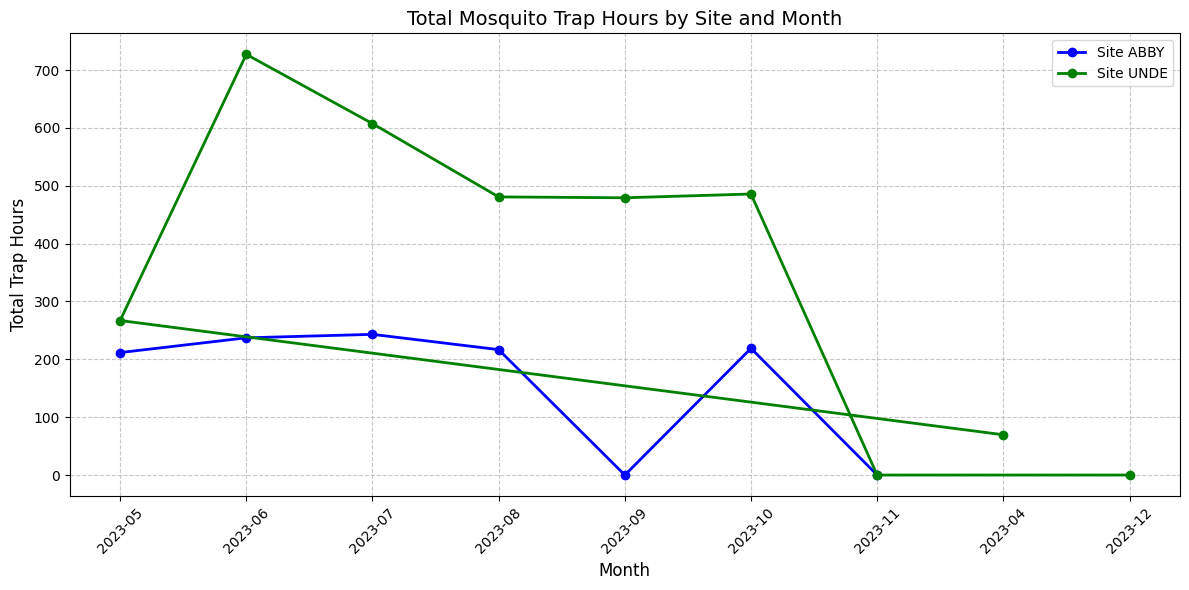

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import glob
import datetime

# Set up output directory for results
output_dir = "mosquito_analysis_results"
os.makedirs(output_dir, exist_ok=True)

# Get current timestamp for file naming
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# -----------------------------------------------------------------------------
# 1. FILE DISCOVERY: Find all mosquito trapping CSV files
# -----------------------------------------------------------------------------
pattern = "**/NEON.*.mos_trapping.*.csv"
trap_files = glob.glob(pattern, recursive=True)
trap_files = [Path(f) for f in trap_files]
print(f"Found {len(trap_files)} mosquito trapping files.")

# Save list of processed files for documentation
file_list_path = os.path.join(output_dir, f"processed_files_{timestamp}.txt")
with open(file_list_path, 'w') as f:
    f.write(f"NEON Mosquito Trapping Analysis - Files Processed on {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
    for file_path in trap_files:
        f.write(f"{file_path}\n")
print(f"File list saved to: {os.path.abspath(file_list_path)}")

# -----------------------------------------------------------------------------
# 2. DATA EXTRACTION: Function to extract and preprocess data from each file
# -----------------------------------------------------------------------------
def preprocess_trap_file(file_path):
    """
    Extract relevant data from a mosquito trapping CSV file.
    
    Args:
        file_path: Path object pointing to the CSV file
        
    Returns:
        DataFrame with site, month, and trapHours columns, or empty DataFrame if error
    """
    try:
        # Read the CSV file
        df = pd.read_csv(file_path, na_values=["", "NA", "NaN"])
        
        # Check for required columns
        if 'trapHours' not in df.columns or 'collectDate' not in df.columns:
            print(f"⚠️ Skipping {file_path.name}: Missing required columns")
            return pd.DataFrame()
            
        # Extract site code from the filename 
        # Format example: NEON.D16.ABBY.DP1.10043.001.mos_trapping.2023-05.basic...
        filename = file_path.name
        file_parts = filename.split('.')
        site_part = file_parts[2]  # Should extract "ABBY" or "UNDE" from the 3rd segment
        
        # Add derived columns
        df['site'] = site_part
        df['month'] = pd.to_datetime(df['collectDate'], errors='coerce').dt.to_period("M").astype(str)
        
        # Return only the columns we need
        return df[['site', 'month', 'trapHours']]
    except Exception as e:
        print(f"❌ Error processing {file_path.name}: {e}")
        return pd.DataFrame()

# -----------------------------------------------------------------------------
# 3. DATA PROCESSING: Process each file and combine results
# -----------------------------------------------------------------------------
print("\nProcessing trap files...")
dfs = []
for file_path in trap_files:
    df = preprocess_trap_file(file_path)
    if not df.empty:
        dfs.append(df)
        print(f"✅ Processed: {file_path.name}")

valid_dfs = [df for df in dfs if not df.empty]
print(f"\nSuccessfully processed {len(valid_dfs)} out of {len(trap_files)} files.")

if not valid_dfs:
    raise ValueError("No valid data found in any mosquito trapping files.")

# Combine all the processed data
all_data = pd.concat(valid_dfs, ignore_index=True)
print(f"Combined dataset has {all_data.shape[0]} rows and {all_data.shape[1]} columns")

# Save the raw combined data
raw_data_path = os.path.join(output_dir, f"mosquito_trap_raw_data_{timestamp}.csv")
all_data.to_csv(raw_data_path, index=False)
print(f"Raw data saved to: {os.path.abspath(raw_data_path)}")

# -----------------------------------------------------------------------------
# 4. DATA AGGREGATION: Summarize by site and month
# -----------------------------------------------------------------------------
# Group by site and month, calculating trap counts and total hours
summary = all_data.groupby(['site', 'month']).agg(
    n_traps=('trapHours', 'count'),       # Count of trap records
    total_trap_hours=('trapHours', 'sum') # Sum of all trap hours
).reset_index()

# Print summary statistics
print("\nSummary of trap hours by site and month:")
print(summary.to_string())

# Save the summary data
summary_path = os.path.join(output_dir, f"mosquito_trap_summary_{timestamp}.csv")
summary.to_csv(summary_path, index=False)
print(f"Summary data saved to: {os.path.abspath(summary_path)}")

# -----------------------------------------------------------------------------
# 5. VISUALIZATION: Create time series plot of trap hours by site
# -----------------------------------------------------------------------------
plt.figure(figsize=(12, 6))

# Create a separate line for each site
site_colors = {'ABBY': 'blue', 'UNDE': 'green'}  # Define colors for consistency
for site, group in summary.groupby("site"):
    # Sort by month for proper chronological display
    group = group.sort_values("month")
    plt.plot(group["month"], group["total_trap_hours"], 
             label=f"Site {site}", 
             marker='o', 
             color=site_colors.get(site, 'gray'),
             linewidth=2)

# Add plot styling
plt.title("Total Mosquito Trap Hours by Site and Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Trap Hours", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot in multiple formats
plot_path_png = os.path.join(output_dir, f"mosquito_trap_hours_{timestamp}.png")
plot_path_pdf = os.path.join(output_dir, f"mosquito_trap_hours_{timestamp}.pdf")
plt.savefig(plot_path_png, dpi=300)
plt.savefig(plot_path_pdf)
print(f"\nPlot saved as PNG: {os.path.abspath(plot_path_png)}")
print(f"Plot saved as PDF: {os.path.abspath(plot_path_pdf)}")

# -----------------------------------------------------------------------------
# 6. ADDITIONAL ANALYSIS: Site comparison statistics
# -----------------------------------------------------------------------------
# Calculate summary statistics by site
site_stats = summary.groupby('site').agg(
    total_months=('month', 'count'),
    avg_trap_hours=('total_trap_hours', 'mean'),
    max_trap_hours=('total_trap_hours', 'max'),
    min_trap_hours=('total_trap_hours', 'min'),
    total_trap_hours=('total_trap_hours', 'sum')
).reset_index()

# Save site comparison
site_stats_path = os.path.join(output_dir, f"site_comparison_{timestamp}.csv")
site_stats.to_csv(site_stats_path, index=False)
print(f"Site comparison stats saved to: {os.path.abspath(site_stats_path)}")

# Display site comparison
print("\nSite Comparison Statistics:")
print(site_stats.to_string())

print(f"\nAnalysis complete! All results saved to: {os.path.abspath(output_dir)}")